In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/_All_Cities_Cleaned.csv')
df.head(5)


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
df.isnull().sum()

,0
seller_type,0
bedroom,0
layout_type,0
property_type,0
locality,0
price,0
area,0
furnish_type,0
bathroom,0
city,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [ ]:
df.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


In [ ]:
# Filter rows where price is <= 1 lakh (100,000 INR)
df = df[df['price'] <= 150000]

# Verify the filter
print(f"Number of rows after filtering: {len(df)}")
print(df['price'].describe())

Number of rows after filtering: 182454
count    182454.000000
mean      27069.153880
std       23130.656003
min        1200.000000
25%       12500.000000
50%       20000.000000
75%       32500.000000
max      150000.000000
Name: price, dtype: float64


In [ ]:
# Filter rows where price is >= 5,000 INR
df = df[df['price'] >= 5000]

# Verify the filter
print(f"Number of rows after filtering out prices < 5,000: {len(df)}")
print(df['price'].describe())

Number of rows after filtering out prices < 5,000: 180878
count    180878.000000
mean      27271.420902
std       23128.953855
min        5000.000000
25%       13000.000000
50%       20000.000000
75%       33000.000000
max      150000.000000
Name: price, dtype: float64


In [ ]:
# Remove rows with more than 6 bathrooms or bedrooms
df = df[(df["bathroom"] <= 6) & (df["bedroom"] <= 6)]

# Check the shape after filtering
print("Remaining rows:", df.shape[0])


Remaining rows: 180818


In [ ]:
df.bathroom.value_counts()

,count
bathroom,
2.0,89612
1.0,52802
3.0,32262
4.0,5115
5.0,869
6.0,158


In [ ]:
df['check'] = df['price'].apply(lambda x: '0' if ',' in str(x) else '1')


In [ ]:
df['bathroom'] =df['bathroom'].round().astype(int)   # rounds 2.5 → 2, 3.7 → 4


In [ ]:
import numpy as np

# checking for nulls again
df=df.replace('', np.nan)
df=df.dropna()
df.shape

df.isnull().sum()

,0
seller_type,0
bedroom,0
layout_type,0
property_type,0
locality,0
price,0
area,0
furnish_type,0
bathroom,0
city,0


In [ ]:
# change the type of bathroom and price to fload
df['bathroom'] = df['bathroom'].astype('float64', errors = 'raise')
df['price'] = df['price'].astype('float64', errors = 'raise')

In [ ]:
# labeling cities into numbers so the ai will undestand
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['city'] = le.fit_transform(df.city.values)
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,check
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,0,1
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,0,1
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,0,1
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,0,1
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,7,1
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,7,1
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,7,1
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,7,1


In [ ]:
le = LabelEncoder()
df['locality'] = le.fit_transform(df.locality.values)
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,check
0,OWNER,2.0,BHK,Apartment,556,20000.0,1450.0,Furnished,2.0,0,1
1,OWNER,1.0,RK,Studio Apartment,620,7350.0,210.0,Semi-Furnished,1.0,0,1
2,OWNER,3.0,BHK,Apartment,1453,22000.0,1900.0,Unfurnished,3.0,0,1
3,OWNER,2.0,BHK,Independent House,2987,13000.0,1285.0,Semi-Furnished,2.0,0,1
4,OWNER,2.0,BHK,Independent House,2379,18000.0,1600.0,Furnished,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,725,13250.0,650.0,Semi-Furnished,1.0,7,1
193007,OWNER,1.0,RK,Studio Apartment,3842,7000.0,350.0,Unfurnished,1.0,7,1
193008,OWNER,1.0,BHK,Apartment,1809,8500.0,389.0,Semi-Furnished,1.0,7,1
193009,AGENT,1.0,BHK,Apartment,3846,16500.0,670.0,Semi-Furnished,2.0,7,1


In [ ]:
# checking data
df.describe()

,bedroom,locality,price,area,bathroom,city
count,180818.000000,180818.000000,180818.000000,180818.000000,180818.000000,180818.000000
mean,1.986102,1975.412299,27249.643675,1095.876821,1.960894,4.119103
std,0.835450,1154.814200,23091.630243,621.433613,0.799563,2.378258
min,1.000000,0.000000,5000.000000,3.000000,1.000000,0.000000
25%,1.000000,1013.000000,13000.000000,650.000000,1.000000,2.000000
50%,2.000000,1841.000000,20000.000000,1000.000000,2.000000,5.000000
75%,3.000000,2976.000000,33000.000000,1320.000000,2.000000,6.000000
max,6.000000,4047.000000,150000.000000,11000.000000,6.000000,7.000000


In [ ]:
df.bathroom.value_counts()

,count
bathroom,
2.0,89612
1.0,52802
3.0,32262
4.0,5115
5.0,869
6.0,158


In [ ]:
# check valus of seller_type

df.seller_type.value_counts()

,count
seller_type,
AGENT,142106
OWNER,37379
BUILDER,1333


In [ ]:
df["seller_type"].replace({'AGENT':0,'OWNER':1,'BUILDER':2}, inplace=True)
df.seller_type.value_counts()

/tmp/ipython-input-688326923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["seller_type"].replace({'AGENT':0,'OWNER':1,'BUILDER':2}, inplace=True)
/tmp/ipython-input-688326923.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["seller_type"].replace({'AGENT':0,'OWNER':1,'BUILDER':2}, in

,count
seller_type,
0,142106
1,37379
2,1333


In [ ]:
df.furnish_type.value_counts()

,count
furnish_type,
Semi-Furnished,92778
Unfurnished,50831
Furnished,37209


In [ ]:
df.layout_type.value_counts()


,count
layout_type,
BHK,172424
RK,8394


In [ ]:
df["layout_type"].replace({'BHK':0,'RK':1}, inplace=True)

/tmp/ipython-input-4064730308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["layout_type"].replace({'BHK':0,'RK':1}, inplace=True)
/tmp/ipython-input-4064730308.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["layout_type"].replace({'BHK':0,'RK':1}, inplace=True)


In [ ]:
# replacing furnish_type with numbers so ai understand
df["furnish_type"].replace({'Furnished':0,'Semi-Furnished':1,'Unfurnished':2}, inplace=True)

/tmp/ipython-input-4185279648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["furnish_type"].replace({'Furnished':0,'Semi-Furnished':1,'Unfurnished':2}, inplace=True)
/tmp/ipython-input-4185279648.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["furnish_type"].replace({'Furnished':0,'

In [ ]:
# cheking furnish_type values

df.furnish_type.value_counts()

,count
furnish_type,
1,92778
2,50831
0,37209


In [ ]:
# cheking property_type values

df.property_type.value_counts()

,count
property_type,
Apartment,137265
Independent Floor,21510
Independent House,11848
Studio Apartment,8394
Villa,1733
Penthouse,68


In [ ]:
# replacing property_type with numbers so ai understand

df["property_type"].replace({'Apartment':0,'Independent Floor':1,'Independent House':2,'Studio Apartment':3,'Villa':4,'Penthouse':5}, inplace=True)

/tmp/ipython-input-1234811863.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_type"].replace({'Apartment':0,'Independent Floor':1,'Independent House':2,'Studio Apartment':3,'Villa':4,'Penthouse':5}, inplace=True)
/tmp/ipython-input-1234811863.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting

In [ ]:
# checking and dropping nulls
df=df.replace('', np.nan)
df=df.dropna()
df.shape
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,check
0,1,2.0,0,0,556,20000.0,1450.0,0,2.0,0,1
1,1,1.0,1,3,620,7350.0,210.0,1,1.0,0,1
2,1,3.0,0,0,1453,22000.0,1900.0,2,3.0,0,1
3,1,2.0,0,2,2987,13000.0,1285.0,1,2.0,0,1
4,1,2.0,0,2,2379,18000.0,1600.0,0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
193006,1,1.0,0,0,725,13250.0,650.0,1,1.0,7,1
193007,1,1.0,1,3,3842,7000.0,350.0,2,1.0,7,1
193008,1,1.0,0,0,1809,8500.0,389.0,1,1.0,7,1
193009,0,1.0,0,0,3846,16500.0,670.0,1,2.0,7,1


In [ ]:
# check the relation between data and price
# Drop the 'locality' column before calculating correlation
data_corr = df.drop('locality', axis=1).corr()['price'].sort_values(ascending=False)
data_corr

,price
price,1.000000
area,0.530597
bathroom,0.527366
bedroom,0.495108
city,0.119338
property_type,-0.142681
layout_type,-0.151431
seller_type,-0.230625
furnish_type,-0.279159
check,NaN


In [ ]:
df.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city', 'check'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['price_normalized'] = scaler.fit_transform(df[['price']])

display(df.head())

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,check,price_normalized
0,1,2.0,0,0,556,20000.0,1450.0,0,2.0,0,1,0.103448
1,1,1.0,1,3,620,7350.0,210.0,1,1.0,0,1,0.016207
2,1,3.0,0,0,1453,22000.0,1900.0,2,3.0,0,1,0.117241
3,1,2.0,0,2,2987,13000.0,1285.0,1,2.0,0,1,0.055172
4,1,2.0,0,2,2379,18000.0,1600.0,0,2.0,0,1,0.089655


In [ ]:
from statsmodels.api import OLS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [ ]:
df["city"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['city'] = encoder.fit_transform(df['city'])
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

{np.int64(0): np.int64(0),
 np.int64(1): np.int64(1),
 np.int64(2): np.int64(2),
 np.int64(3): np.int64(3),
 np.int64(4): np.int64(4),
 np.int64(5): np.int64(5),
 np.int64(6): np.int64(6),
 np.int64(7): np.int64(7)}

In [ ]:
ahmedabad_df = df[df['city'] == 0].copy()
bangalore_df = df[df['city'] == 1].copy()
chennai_df = df[df['city'] == 2].copy()
delhi_df = df[df['city'] == 3].copy()
hyderabad_df = df[df['city'] == 4].copy()
kolkata_df = df[df['city'] == 5].copy()
mumbai_df = df[df['city'] == 6].copy()
pune_df = df[df['city'] == 7].copy()

print("DataFrames created for each city:")
print(f"Ahmedabad: {len(ahmedabad_df)} rows")
print(f"Bangalore: {len(bangalore_df)} rows")
print(f"Chennai: {len(chennai_df)} rows")
print(f"Delhi: {len(delhi_df)} rows")
print(f"Hyderabad: {len(hyderabad_df)} rows")
print(f"Kolkata: {len(kolkata_df)} rows")
print(f"Mumbai: {len(mumbai_df)} rows")
print(f"Pune: {len(pune_df)} rows")

DataFrames created for each city:
Ahmedabad: 18389 rows
Bangalore: 22782 rows
Chennai: 8419 rows
Delhi: 24810 rows
Hyderabad: 10333 rows
Kolkata: 9309 rows
Mumbai: 64551 rows
Pune: 22225 rows


In [ ]:
# df.drop(columns=['locality_encoded'], inplace=True) # This line caused the error as the column doesn't exist

In [ ]:
df[['city', 'locality']].sample(10)

,city,locality
54531,3,962
45287,2,3640
162348,6,804
1567,0,3294
4127,0,577
128045,6,3541
90638,4,1775
132183,6,2692
80070,3,3027
12870,0,3716


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
import numpy as np

# Make sure price exists
df = df.dropna(subset=['price', 'locality'])

# Use log(price) for smoother averages
df['log_price'] = np.log1p(df['price'])

# Create empty column for encoded locality
df['locality_encoded'] = np.nan

# Initialize encoder with missing-value handling
encoder = ce.TargetEncoder(
    cols=['locality'],
    handle_missing='value',
    handle_unknown='value'
)

# Apply encoding city-wise (so Mumbai ≠ Delhi)
for city_code in df['city'].unique():
    city_mask = df['city'] == city_code
    df_city = df[city_mask]
    encoder.fit(df_city['locality'], df_city['log_price'])
    df.loc[city_mask, 'locality_encoded'] = encoder.transform(df_city['locality']).values

# Drop the temporary log column
df.drop(columns=['log_price'], inplace=True)


In [ ]:
df.drop(columns=['locality'], inplace=True)


In [ ]:
df.head(5)

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,city,check,price_normalized,locality_encoded
0,1,2.0,0,0,20000.0,1450.0,0,2.0,0,1,0.103448,10.367767
1,1,1.0,1,3,7350.0,210.0,1,1.0,0,1,0.016207,9.969440
2,1,3.0,0,0,22000.0,1900.0,2,3.0,0,1,0.117241,10.025286
3,1,2.0,0,2,13000.0,1285.0,1,2.0,0,1,0.055172,9.570993
4,1,2.0,0,2,18000.0,1600.0,0,2.0,0,1,0.089655,10.152743


In [ ]:
X = df.drop(['price', 'price_normalized'], axis=1)
y = df['price']


In [ ]:
y = np.log1p(df['price'])

In [ ]:
df.drop(columns=['check'], inplace=True)



In [ ]:
df_city['locality_area_interaction'] = df_city['locality_encoded'] * df_city['area']
df_city['size_per_bhk'] = df_city['area'] / df_city['bedroom'].replace(0, 1)

/tmp/ipython-input-1700261466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['locality_area_interaction'] = df_city['locality_encoded'] * df_city['area']
/tmp/ipython-input-1700261466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city['size_per_bhk'] = df_city['area'] / df_city['bedroom'].replace(0, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ✅ Select Chennai data
city_code = 1   # (replace 1 with the actual code for Chennai if different)
df_city = df[df['city'] == city_code].copy()

# ✅ Split input (X) and target (y)
X_city = df_city.drop(['price', 'price_normalized'], axis=1)
y_city = np.log1p(df_city['price'])  # Log-transform for stable learning

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_city, y_city, test_size=0.2, random_state=42
)

# ✅ Define Random Forest model
model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    max_depth=15,          # limit tree depth to reduce overfitting
    min_samples_split=5,   # minimum samples before split
    min_samples_leaf=3,    # minimum samples in each leaf
    random_state=42,
    n_jobs=-1              # use all CPU cores for speed
)

# ✅ Train the model
model.fit(X_train, y_train)

# ✅ Make predictions
pred = model.predict(X_test)

# ✅ Evaluate performance
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

# ✅ Display results
print(f"📍 Chennai (Random Forest) Results:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


📍 Chennai (Random Forest) Results:
MAE  : 0.15
RMSE : 0.21
R²   : 0.8603


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# Output directory
output_dir = './chennai_models'
os.makedirs(output_dir, exist_ok=True)

# Features (same as your original code)
features = ['seller_type', 'bedroom', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom']

# Model: GradientBoostingRegressor (simpler alternative to LightGBM/XGBoost)
model = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.2, random_state=42)

# Filter for Chennai (replace '1' with Chennai's actual city_code from df['city'].unique())
city_code = 1  # Update with Chennai's city code
df_city = df[df['city'] == city_code].copy()
city_name = "Chennai"

print(f"\nProcessing {city_name}...")

# Check if required columns exist
if 'price' not in df_city.columns or 'locality_encoded' not in df_city.columns:
    print(f"Error: Missing 'locality_encoded' or 'price' in {city_name}.")
    exit()

print(f"{city_name}: {len(df_city)} rows, {df_city['locality_encoded'].nunique()} unique encoded localities")

# Encode categorical variables (same as your code)
for col in ['seller_type', 'layout_type', 'property_type', 'furnish_type']:
    df_city[col] = df_city[col].astype('category').cat.codes

# Add interaction features (same as your code)
df_city['locality_area_interaction'] = df_city['locality_encoded'] * df_city['area']
df_city['locality_bhk_interaction'] = df_city['locality_encoded'] * df_city['bedroom']
df_city['size_per_bhk'] = df_city['area'] / df_city['bedroom'].replace(0, 1)
df_city['bathroom_per_bhk'] = df_city['bathroom'] / df_city['bedroom'].replace(0, 1)
df_city['furnish_bathroom_interaction'] = df_city['furnish_type'] * df_city['bathroom']
df_city['area_bathroom_interaction'] = df_city['area'] * df_city['bathroom']

# Final features (same as your code)
model_features = features + ['locality_encoded', 'locality_area_interaction', 'locality_bhk_interaction',
                            'size_per_bhk', 'bathroom_per_bhk', 'furnish_bathroom_interaction', 'area_bathroom_interaction']

# Prepare X, y
X = df_city[model_features]
y = np.log1p(df_city['price'])  # Log-transform price

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Keep column names after scaling to avoid warnings
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=model_features, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=model_features, index=X_test.index)

# Train and evaluate the model
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print(f"{city_name} GradientBoosting - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Save model and scaler
joblib.dump(model, os.path.join(output_dir, f'{city_name}_GradientBoosting.pkl'))
joblib.dump(scaler, os.path.join(output_dir, f'{city_name}_scaler.pkl'))

print("\nDone!")


Processing Chennai...
Chennai: 22782 rows, 646 unique encoded localities
Chennai GradientBoosting - MAE: 0.16, RMSE: 0.21, R²: 0.8562

Done!


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor
import joblib

# Output directory
output_dir = './chennai_models'
os.makedirs(output_dir, exist_ok=True)

# City selection (use your Chennai code)
city_code = 1
city_name = "Chennai"

# Filter data
df_city = df[df['city'] == city_code].copy()

# Encode categorical variables
for col in ['seller_type', 'layout_type', 'property_type', 'furnish_type']:
    df_city[col] = df_city[col].astype('category').cat.codes

# Features
features = ['seller_type', 'bedroom', 'layout_type', 'property_type',
            'area', 'furnish_type', 'bathroom', 'locality_encoded']

# Feature interactions
df_city['locality_area_interaction'] = df_city['locality_encoded'] * df_city['area']
df_city['size_per_bhk'] = df_city['area'] / df_city['bedroom'].replace(0, 1)
df_city['bathroom_per_bhk'] = df_city['bathroom'] / df_city['bedroom'].replace(0, 1)

# Final feature set
model_features = features + ['locality_area_interaction', 'size_per_bhk', 'bathroom_per_bhk']

# Split and scale
X = df_city[model_features]
y = np.log1p(df_city['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ LightGBM Model
model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train & evaluate
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print(f"{city_name} LightGBM - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Save model & scaler
joblib.dump(model, os.path.join(output_dir, f'{city_name}_LightGBM.pkl'))
joblib.dump(scaler, os.path.join(output_dir, f'{city_name}_scaler.pkl'))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1022
[LightGBM] [Info] Number of data points in the train set: 18225, number of used features: 11
[LightGBM] [Info] Start training from score 9.770057
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


['./chennai_models/Chennai_scaler.pkl']

In [ ]:
!pip install shap


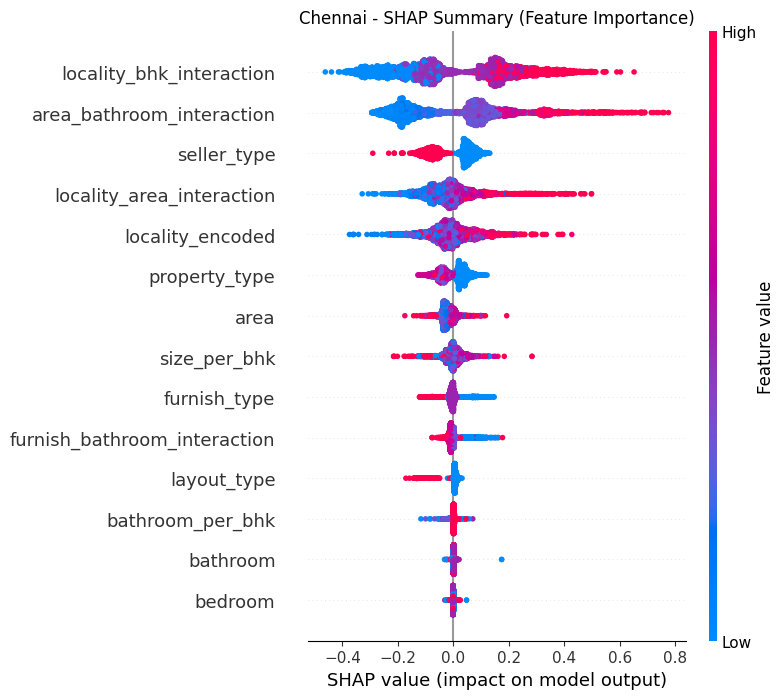

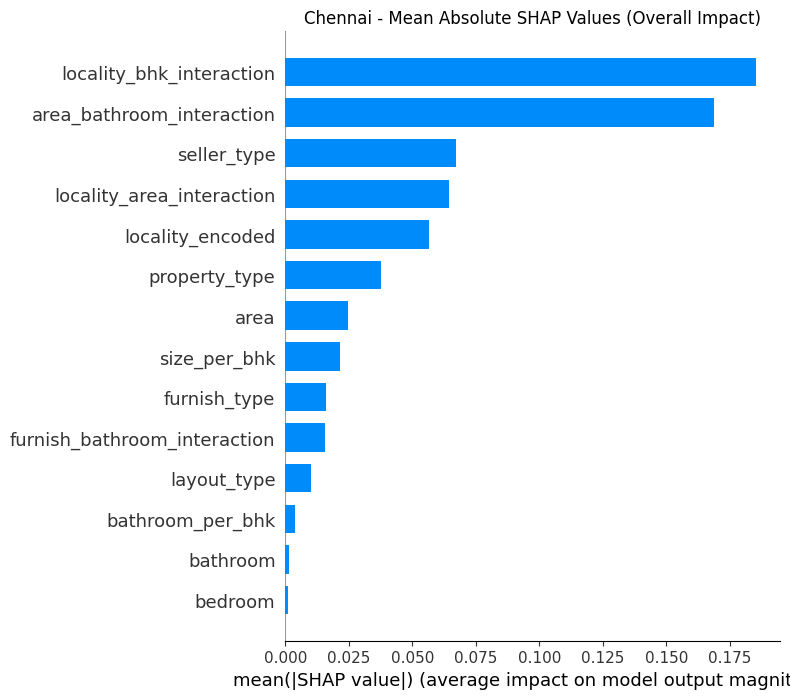

In [ ]:
import shap
import matplotlib.pyplot as plt

# Load model and scaler (if not already loaded)
model = joblib.load(os.path.join(output_dir, f'{city_name}_GradientBoosting.pkl'))
scaler = joblib.load(os.path.join(output_dir, f'{city_name}_scaler.pkl'))

# Prepare sample data
X_sample = X_test_scaled.copy()
X_sample.columns = model_features  # keep feature names

# ===== Use correct SHAP explainer for GradientBoosting =====
# (TreeExplainer works for tree-based models like GradientBoosting, RandomForest, LightGBM)
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# ===== Summary Plot (Feature Importance Overall) =====
plt.title(f"{city_name} - SHAP Summary (Feature Importance)")
shap.summary_plot(shap_values, X_sample, show=True)

# ===== Bar Plot (Mean Absolute SHAP Value per Feature) =====
plt.title(f"{city_name} - Mean Absolute SHAP Values (Overall Impact)")
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=True)



In [ ]:
print(f"Number of rows in chennai_df: {len(chennai_df)}")
print(f"Number of rows in chennai_df using shape: {chennai_df.shape[0]}")

Number of rows in chennai_df: 8419
Number of rows in chennai_df using shape: 8419


In [ ]:
chennai_df.head(5)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,check,price_normalized
41525,1,3.0,0,0,133,17000.0,1570.0,1,2.0,2,1,0.082759
41526,1,2.0,0,0,1672,16000.0,1402.0,1,2.0,2,1,0.075862
41527,1,2.0,0,0,83,20000.0,800.0,1,2.0,2,1,0.103448
41528,1,2.0,0,0,3238,14000.0,1180.0,2,2.0,2,1,0.062069
41529,1,1.0,0,2,2194,7000.0,400.0,2,1.0,2,1,0.013793


In [ ]:
chennai_df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,check,price_normalized
41525,1,3.0,0,0,133,17000.0,1570.0,1,2.0,2,1,0.082759
41526,1,2.0,0,0,1672,16000.0,1402.0,1,2.0,2,1,0.075862
41527,1,2.0,0,0,83,20000.0,800.0,1,2.0,2,1,0.103448
41528,1,2.0,0,0,3238,14000.0,1180.0,2,2.0,2,1,0.062069
41529,1,1.0,0,2,2194,7000.0,400.0,2,1.0,2,1,0.013793
...,...,...,...,...,...,...,...,...,...,...,...,...
50177,1,1.0,0,0,2832,8000.0,500.0,0,1.0,2,1,0.020690
50178,1,3.0,0,0,3566,50000.0,1850.0,0,3.0,2,1,0.310345
50179,1,2.0,0,1,3374,13000.0,1000.0,1,2.0,2,1,0.055172
50180,1,1.0,0,1,2900,10000.0,460.0,2,1.0,2,1,0.034483


In [ ]:
import pandas as pd
import numpy as np
import joblib

# ===== Load the trained model and scaler =====
model = joblib.load('./chennai_models/Chennai_GradientBoosting.pkl')
scaler = joblib.load('./chennai_models/Chennai_scaler.pkl')

# ===== Define the features used during training =====
model_features = [
    'seller_type', 'bedroom', 'layout_type', 'property_type',
    'area', 'furnish_type', 'bathroom', 'locality_encoded',
    'locality_area_interaction', 'locality_bhk_interaction',
    'size_per_bhk', 'bathroom_per_bhk',
    'furnish_bathroom_interaction', 'area_bathroom_interaction'
]

# ===== Take user input =====
print("Enter the details of the property in Chennai 👇")

seller_type = int(input("Seller Type (0 = Owner, 1 = Agent, 2 = Builder): "))
bedroom = int(input("Number of Bedrooms: "))
layout_type = int(input("Layout Type (0 = BHK, 1 = RK): "))
property_type = int(input("Property Type (0 = Apartment, 1 = House, 2 = Villa): "))
area = float(input("Area in sq.ft: "))
furnish_type = int(input("Furnish Type (0 = Unfurnished, 1 = Semi, 2 = Furnished): "))
bathroom = int(input("Number of Bathrooms: "))
locality_encoded = float(input("Enter locality_encoded value (1–646 based on your dataset): "))

# ===== Create interaction features =====
locality_area_interaction = locality_encoded * area
locality_bhk_interaction = locality_encoded * bedroom
size_per_bhk = area / max(bedroom, 1)
bathroom_per_bhk = bathroom / max(bedroom, 1)
furnish_bathroom_interaction = furnish_type * bathroom
area_bathroom_interaction = area * bathroom

# ===== Create dataframe for prediction =====
new_data = pd.DataFrame([[
    seller_type, bedroom, layout_type, property_type, area,
    furnish_type, bathroom, locality_encoded,
    locality_area_interaction, locality_bhk_interaction,
    size_per_bhk, bathroom_per_bhk,
    furnish_bathroom_interaction, area_bathroom_interaction
]], columns=model_features)

# ===== Scale the input =====
new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=model_features)

# ===== Predict rent =====
log_pred = model.predict(new_data_scaled)
predicted_rent = np.expm1(log_pred)[0]

print(f"\n🏠 Predicted Rent for this Property in Chennai: ₹{predicted_rent:,.2f}")


Enter the details of the property in Chennai 👇
Seller Type (0 = Owner, 1 = Agent, 2 = Builder): 0
Number of Bedrooms: 3
Layout Type (0 = BHK, 1 = RK): 0
Property Type (0 = Apartment, 1 = House, 2 = Villa): 1
Area in sq.ft: 1000
Furnish Type (0 = Unfurnished, 1 = Semi, 2 = Furnished): 0
Number of Bathrooms: 2
Enter locality_encoded value (1–646 based on your dataset): 4

🏠 Predicted Rent for this Property in Chennai: ₹16,365.80


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ======================
# Load Model and Scaler
# ======================
model = joblib.load('./chennai_models/Chennai_GradientBoosting.pkl')
scaler = joblib.load('./chennai_models/Chennai_scaler.pkl')

# ======================
# Define Feature Order
# ======================
model_features = [
    'seller_type', 'bedroom', 'layout_type', 'property_type', 'area', 'furnish_type', 'bathroom',
    'locality_encoded', 'locality_area_interaction', 'locality_bhk_interaction',
    'size_per_bhk', 'bathroom_per_bhk', 'furnish_bathroom_interaction', 'area_bathroom_interaction'
]

# ======================
# Get User Inputs
# ======================
print("Enter property details for Chennai rent prediction:\n")

seller_type = int(input("Seller Type (0=Owner, 1=Agent, 2=Builder): "))
bedroom = int(input("Number of Bedrooms: "))
layout_type = int(input("Layout Type (0=BHK, 1=RK): "))
property_type = int(input("Property Type (0=Apartment, 1=House, 2=Villa): "))
area = float(input("Area (in sq.ft): "))
furnish_type = int(input("Furnish Type (0=Unfurnished, 1=Semi, 2=Furnished): "))
bathroom = int(input("Number of Bathrooms: "))
locality_encoded = float(input("Locality Encoded Value (e.g., between 0 and 650): "))

# ======================
# Feature Engineering
# ======================
locality_area_interaction = locality_encoded * area
locality_bhk_interaction = locality_encoded * bedroom
size_per_bhk = area / max(bedroom, 1)
bathroom_per_bhk = bathroom / max(bedroom, 1)
furnish_bathroom_interaction = furnish_type * bathroom
area_bathroom_interaction = area * bathroom

# ======================
# Create DataFrame
# ======================
new_data = pd.DataFrame([[
    seller_type, bedroom, layout_type, property_type, area, furnish_type, bathroom,
    locality_encoded, locality_area_interaction, locality_bhk_interaction,
    size_per_bhk, bathroom_per_bhk, furnish_bathroom_interaction, area_bathroom_interaction
]], columns=model_features)

# ======================
# Scale the Input
# ======================
new_data_scaled = pd.DataFrame(scaler.transform(new_data), columns=model_features)

# ======================
# Predict Rent
# ======================
log_pred = model.predict(new_data_scaled)
predicted_rent = np.expm1(log_pred)[0]
print(f"\n🏠 Predicted Rent for this Property in Chennai: ₹{predicted_rent:,.2f}")

# ======================
# Evaluate if Actual Rent Provided
# ======================
true_rent = input("\nEnter the actual rent (optional, press Enter to skip): ")

if true_rent.strip():
    true_rent = float(true_rent)
    log_true = np.log1p(true_rent)
    mae = mean_absolute_error([log_true], [log_pred[0]])
    rmse = np.sqrt(mean_squared_error([log_true], [log_pred[0]]))
    r2 = r2_score([log_true], [log_pred[0]])
    abs_error = abs(true_rent - predicted_rent)
    percent_error = (abs_error / true_rent) * 100

    print("\n📊 Evaluation Metrics:")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"Error Difference : ₹{abs_error:,.2f}")
    print(f"Percentage Error : {percent_error:.2f}%")
else:
    print("\nNo actual rent entered. Only prediction displayed.")


Enter property details for Chennai rent prediction:

Seller Type (0=Owner, 1=Agent, 2=Builder): 1
Number of Bedrooms: 2
Layout Type (0=BHK, 1=RK): 0
Property Type (0=Apartment, 1=House, 2=Villa): 0
Area (in sq.ft): 1180
Furnish Type (0=Unfurnished, 1=Semi, 2=Furnished): 2
Number of Bathrooms: 2
Locality Encoded Value (e.g., between 0 and 650): 3238

🏠 Predicted Rent for this Property in Chennai: ₹75,539.01

Enter the actual rent (optional, press Enter to skip): 14000

📊 Evaluation Metrics:
MAE  : 1.6855
RMSE : 1.6855
R²   : nan
Error Difference : ₹61,539.01
Percentage Error : 439.56%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
df.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'price',
       'area', 'furnish_type', 'bathroom', 'city', 'price_normalized',
       'locality_encoded'],
      dtype='object')

In [ ]:
df.locality_encoded.value_counts()

,count
locality_encoded,
9.901497,4462
10.617820,3538
10.443615,3361
10.025390,2933
10.045009,2613
...,...
9.799332,1
9.778187,1
9.784887,1
